In [4]:
from random import random
from random import seed

# Inicialización de la red 
Utilizaremos pesos generados de forma aleatoria.

In [5]:
# Inicialización de una red con 1 capa de entrada, 1 capa oculta y 1 capa de salida

def init_network(n_inputs, n_hidden, n_outputs):
    
    """ Inicialización de la red.
        
        :param n_inputs: (int) Número de variables de entrada a la red. 
        :param n_hidden: (int) Número de neuronas en la capa oculta.
        :param n_outputs: (int) Número de neuronas en la capa de salida.
        
     """ 
    
    # Inicializamos una variable de tipo lista, donde iremos almacenando las capas que generemos
    network = list()
    
    # CREACIÓN DE LA CAPA OCULTA
    # Para cada neurona de la capa oculta, generamos tantos pesos como n_inputs haya, más uno que corresponde al bias
    # El bias es equivalente a otro peso más, solo que no se multiplicará por ninguna de los valores que recibe la neurona
    # (Tener siempre en cuenta que, en cada lista de pesos, el último elemento será, por tanto, el bias)
    hidden_layer = [{"weights": [random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    
    # CREACIÓN DE LA CAPA DE SALIDA
    # Para cada neurona de la capa de salida, generamos tantos pesos como n_hidden haya, más uno que corresponde al bias
    output_layer = [{"weights": [random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    
    return network   

In [6]:
# Plantamos una semilla para que los valores aleatorios siempre sean los mismos
seed(1)
# Vamos a probar la inicialización de una red con 2 neuronas en la capa de entrada, 1 en la capa oculta y 2 en la de salida
init_network(2, 1, 2)

[[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
 [{'weights': [0.2550690257394217, 0.49543508709194095]},
  {'weights': [0.4494910647887381, 0.651592972722763]}]]

La arquitectura anterior corresponde a una red como la siguiente:
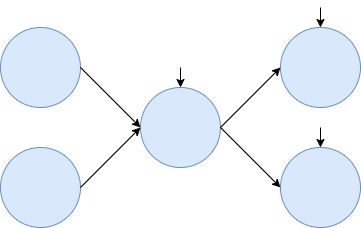

Al inicializar la red vemos que se genera una lista de listas, en la que:
- La primera lista contiene los pesos de la única neurona de la capa oculta, más el bias asociado (que es el último elemento de esta lista de 3 pesos). Es decir, los valores  *0.13436424411240122* y *0.8474337369372327* son los pesos que recibe la neurona, asociados a los valores de la capa de entrada, mientras que *0.763774618976614* es el bias (que no se multiplicará por ninguno de los valores de la capa de entrada).
- La segunda lista contiene, a su vez, dos diccionarios de pesos:
    - Uno con el peso que conecta la neurona de la capa oculta con una de las neuronas de salida, más el bias (que es el último elemento de esta lista de 2 pesos).
    - Otro con el peso que conecta la neurona de la capa oculta con la otra neurona de salida, más el bias (que es el último elemento de esta lista de 2 pesos).

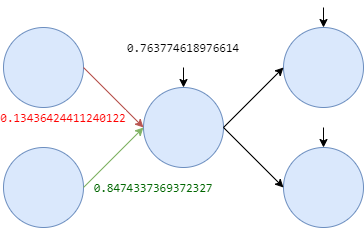

# Pase hacia delante

La salida de la neurona de la capa oculta (a la que asociaremos el subíndice **h**, de *hidden*) se puede calcular de la siguiente manera:

`output_h = activation_function(weight_i1 * input_i1 + weight_i2 * input_i2 + bias_h)`

Donde **i1** e **i2** son los subíndices asociados a las neuronas de la capa de entrada (*input*).

Es decir, necesitamos calcular la suma ponderada de las entradas, a la que añadiremos también el valor del bias:

`output_h = activation_function(sum(weight_i * input_i) + bias)`

Para ello, vamos a definir dos funciones: una que permitirá calcular sumas ponderadas y otra que permitirá aplicar una función de activación a una suma ponderada ya calculada.

In [13]:
def weighted_sum(weights, inputs):
    
    """ Cálculo de la suma ponderada dentro de una neurona en concreto.
        
        :param weights: (list) Lista de pesos asociados a las entradas que recibe la neurona. 
        :param inputs: (list) Lista de entradas que recibe la neurona.
        
    """
    
    # En primer lugar, añadimos el bias a la suma ponderada, ya que no hay que multiplicarlo por ninguna entrada
    # (Recordemos que es el último elemento de la lista de pesos)
    suma_ponderada = weights[-1]
    
    # Para el resto de pesos de la lista
    for i in range(len(weights) - 1):
        
        # Se añade a la suma ponderada la multiplicación de cada peso por su respectiva entrada
        suma_ponderada += weights[i] * inputs[i]
        
    return suma_ponderada       

Para este ejemplo, se utilizará la función de activación sigmoide:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

In [14]:
def activation_function(suma_ponderada):    
    
    """ Aplicación de una función de activación.
        
        :param suma_ponderada: (float) Suma ponderada de las entradas que recibe una neurona. 
        
     """
    
    # Función sigmoide (logística)
    return 1.0 / (1.0 + np.exp(-suma_ponderada))    

Recordemos cómo funciona el pase hacia delante:

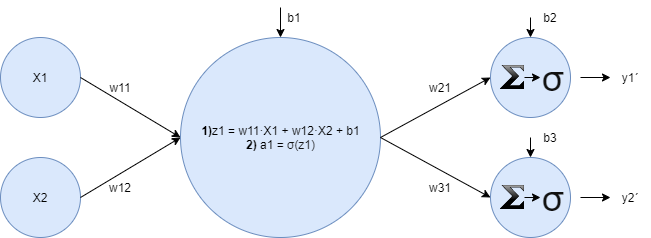

In [24]:
def forward_propagation(network, row):
    
    """ Pase hacia delante en una red neuronal.
        
        :param network: (list) Lista de pesos asociados a las entradas. 
        :param row: (list) Lista de entradas.
        
     """ 
    
    # Las primeras entradas que recibe la red son los datos de la fila del dataset que introducimos
    inputs = row
    
    # Inicializamos un contador de capas, para controlar en qué punto de la red estamos
    # Empezamos en la capa 1 (la de entrada)
    layer_idx = 1
    
    # Para cada capa en la red
    for layer in network:
        
        # Sumamos 1 al contador de capas (ya que empezamos a analizar la primera capa oculta)
        layer_idx += 1
        
        # Vamos a ver qué pesos tienen asociados todas las neuronas de la capa
        print(f"Pesos de las neuronas de la capa {layer_idx}: {layer}")
        
        # Las entradas de cada capa irán cambiando
        # Las entradas de la última capa, en este caso, serán las salidas de la capa oculta
        new_inputs = list()
        
        # Inicializamos un contador de neuronas para la capa considerada
        neuron_idx = 1
        
        # Para cada neurona de la capa que estamos considerando
        for neuron in layer:
            
            # Vamos a ver los pesos que tiene asociados la neurona
            print(f"Pesos de las entradas que recibe la neurona {neuron_idx} de la capa {layer_idx}: {neuron}")
            
            # Calculamos la salida en esta neurona: 
            # a) Suma ponderada
            suma = weighted_sum(neuron["weights"], inputs)
            # b) Aplicación de la función de activación a la suma ponderada
            neuron["output"] = activation_function(suma)
            
            # Vamos a ver el resultado de las operaciones anteriores, que es la salida de la neurona
            print(f"Salida de la neurona {neuron_idx} de la capa {layer_idx}: {neuron['output']}")
            print("\n")
            
            # Almacenamos la salida de esta neurona, que será una de las entradas de la capa siguiente
            new_inputs.append(neuron["output"])
            
            # Sumamos una unidad al contador de neuronas de esta capa
            neuron_idx += 1
        
        # Las entrada de la capa siguiente serán las salidas de esta capa
        inputs = new_inputs
        
    return inputs     

Vamos a comprobar cómo funciona el pase hacia delante, haciendo uso de las funciones que hemos definido hasta ahora.

In [16]:
# Fijamos la semilla para que los resultados random siempre sean los mismos
seed(1)

# Inicializamos la red, guardando la estructura generada en una variable
network = init_network(2, 1, 2)

# Mostramos la red generada, con pesos inicializados de forma aleatoria
network

[[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
 [{'weights': [0.2550690257394217, 0.49543508709194095]},
  {'weights': [0.4494910647887381, 0.651592972722763]}]]

In [17]:
# Nos inventamos una fila de datos, que serán las entradas de la red en la primera capa
row = [1, 0]

In [25]:
# Probamos cómo funciona el pase hacia delante en la red, introduciendo la fila de datos que nos hemos inventado
output = forward_propagation(network, row)
output

Pesos de las neuronas de la capa 2: [{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941}]
Pesos de las entradas que recibe la neurona 1 de la capa 2: {'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941}
Salida de la neurona 1 de la capa 2: 0.7105668883115941


Pesos de las neuronas de la capa 3: [{'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887}, {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748}]
Pesos de las entradas que recibe la neurona 1 de la capa 3: {'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887}
Salida de la neurona 1 de la capa 3: 0.6629970129852887


Pesos de las entradas que recibe la neurona 2 de la capa 3: {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748}
Salida de la neurona 2 de la capa 3: 0.7253160725279748




[0.6629970129852887, 0.7253160725279748]

# Pase hacia atrás
Para poder hacer el pase hacia atrás, necesitamos calcular el error entre la salida de la red (predicción)  y el valor real. Una vez calculado el error en la salida, este se puede retropropagar hacia las capas anteriores, actualizando los pesos de la forma que sea necesaria para reducir el error en la siguiente iteración del entrenamiento de la red.

## Cálculo de la derivada de la función de activación

Recordemos cómo era la función sigmoide:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

La derivada de esta función será, por tanto:
$${\sigma(x)}' =  \frac{e^{-x}}{^{(1+e^{-x})^{2}}}$$

Que también se puede expresar de la siguiente manera:
$${\sigma(x)}' =  \sigma(x)(1 - \sigma(x))$$

In [37]:
def activ_func_derivative(active_output):
    
    """ Cálculo de la pendiente, dado un valor de salida de una neurona.
        
        :param active_output: (float) El resultado de aplicar la función 
        de activación a una suma ponderada en una neurona. 
        
     """
    
    derivative = active_output * (1.0 - active_output)
    return derivative

## Retropropagación de errores

Lo primero que tenemos que hacer para poder retropropagar los errores es calcular el error para cada neurona de salida. 

Para ello, en primer lugar, recordemos el funcionamiento de la propagación hacia delante:

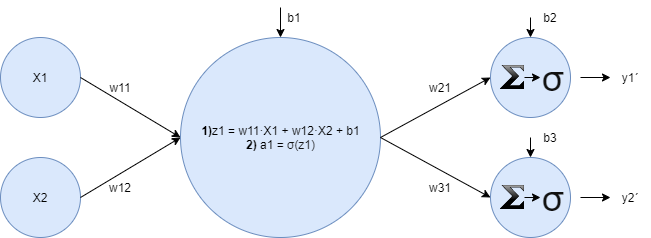

Dado que el aprendizaje es de tipo supervisado, podemos calcular el error para una neurona *n* de la capa de salida de la siguiente manera:

`error_n = (expected_value - neuron_output) * activ_func_derivative(neuron_output)`

En la capa oculta, la señal de error de calcula de forma un poco distinta. En este caso, la señal de error de cada neurona es el error ponderado de cada neurona en la capa de salida.

Para entenderlo mejor, es útil imaginar que el error viaja de vuelta desde la capa de salida hasta la capa oculta, recorriendo los pesos que las unen. 

La señal de error retropropagada se acumula y se utiliza para calcular el error de una neurona *n* en la capa oculta:

`error_n = (weight_k * error_j) * activ_func_derivative(output_n)`

Donde:
- *error_j* es la señal de error de la j-ésima neurona en la capa de salida
- *weight_k* es el peso que conecta la k-ésima neurona a la neurona actual
- *output_n* es la salida de la neurona actual

La señal de error calculada para cada neurona se almacena con el nombre *delta* para reflejar el cambio que implica el error en la neurona.

In [40]:
def backpropagation_error(network, expected_values):
    
    """ Pase hacia atrás en una red neuronal.
        
        :param network: (list) Lista con la estructura de una red inicializada.
        :param expected: (list) Lista de etiquetas (valores esperados para una fila de datos).
        
     """
    
    # Se empieza a trabajar desde la última capa de la red hasta la primera
    # Para cada capa de la red, empezando por la de salida:
    for i in reversed(range(len(network))):
        
        # Tomamos la capa
        layer = network[i]
        
        # Inicializamos los errores de esa capa
        layer_errors = list()
        
        # Si no estamos en la capa de salida
        if i != len(network) - 1:
            
            # Para cada neurona de la capa
            for j in range(len(layer)):
                
                # Inicializamos el error de la neurona
                neuron_error = 0.0
                
                # Para cada neurona de la siguiente capa
                for neuron in network[i +1]:
                    
                    # Se le suma a la neurona en estudio una señal de error distinta
                    # Señal de error = peso j de la neurona * delta de la neurona
                    neuron_error += (neuron["weights"][j] * neuron["delta"])
                    
                # Se almacena la señal de error de la neurona en los errores de esta capa
                layer_errors.append(neuron_error)
        
        # Si estamos en la capa de salida
        else:
            
            # Para cada neurona en la capa de salida
            for j in range(len(layer)):
                
                # Tomamos la neurona
                neuron = layer[j]
                
                # Almacenamos el error
                # El error de calcula como la diferencia entre el valor predicho
                # y el valor esperado para la neurona en cuestión
                layer_errors.append(expected_values[j] - neuron["output"])
                
        # Para cada neurona de la capa en la que estemos:
        for j in range(len(layer)):
            
            # Tomamos la neurona
            neuron = layer[j]
            
            # Se almacena la señal de error (delta) de la neurona
            # El delta de la neurona se calcula como el error de la neurona 
            # por la derivada de la f.activ aplicada sobre la salida de dicha neurona.
            neuron["delta"] = layer_errors[j] * activ_func_derivative(neuron["output"])

Vamos a comprobar cómo funciona el pase hacia atrás:

In [31]:
# Ya habíamos inicializado la red
network

[[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614],
   'output': 0.7105668883115941}],
 [{'weights': [0.2550690257394217, 0.49543508709194095],
   'output': 0.6629970129852887},
  {'weights': [0.4494910647887381, 0.651592972722763],
   'output': 0.7253160725279748}]]

In [32]:
# Nos inventamos unos valores esperados
expected_values = [0,1]

In [41]:
# Ejecutamos la retropropagación
backpropagation_error(network, expected_values)

In [42]:
# Comprobamos cómo se han generado las señales de error (deltas)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941, 'delta': -0.002711797799238243}]
[{'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887, 'delta': -0.14813473120687762}, {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748, 'delta': 0.05472601157879688}]


# Entrenamiento de la red
Para entrenar la red, se utiliza el algoritmo de descenso de gradiente estocástico.

En cada iteración de entrenamiento:
- Se introduce una fila del dataset en la red.
- Se hace un pase hacia delante.
- Se hace un pase hacia atrás.
- Se actualizan los pesos y biases de la red.

## Actualización de pesos
Una vez calculados los errores de cada neurona mediante la función de retropropagación definida anteriormente, se pueden utilizar para actualizar los pesos de la siguiente manera:

`weight = weight + learning_rate * error * input`

In [53]:
def update_weights(network, row, l_rate):
    
    """ Actualización de pesos de una red tras haber hecho un pase hacia delante
        y otro hacia atrás.
        
        :param network: (list) Lista con la estructura de una red inicializada.
        :param row: (list) Lista de valores de entrada.
        :param l_rate: (float) Tasa de aprendizaje (learning_rate).
        
     """
    
    # Para cada capa de la red
    for i in range(len(network)):
        
        # Se toman todos los valores de entradas menos el último
        inputs = row[:-1]
        
        # Si no estamos en la capa de entrada
        if i != 0:
            
            # Las entradas son las salidas de la capa anterior
            inputs = [neuron['output'] for neuron in network[i - 1]]
            
        # Para cada neurona de la capa en la que estamos
        for neuron in network[i]:
            
            # Para cada entrada 
            for j in range(len(inputs)):
                
                # Se aplica la regla de actualización a los pesos de la neurona
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
                
            # Se aplica la regla de actualización al bias
            neuron['weights'][-1] += l_rate * neuron['delta']

## Entrenamiento iterativo
Para entrenar la red, como ya se ha comentado, se utiliza el algoritmo de descenso de gradiente estocástico.

Para ello:
- Se define un número máximo de *epochs*. 
- En capa epoch, se actualizan los parámetros de la red.



In [58]:
# Train a network for a fixed number of epochs
def train(network, train_data, l_rate, n_epoch, n_outputs):
    
    """ Entrenamiento de una red, dado un número fijo de epochs.
        
        :param network: (list) Lista con la estructura de una red inicializada.
        :param train_data: (list) Lista de valores de entrada.
        :param l_rate: (float) Tasa de aprendizaje (learning_rate).
        :param n_epoch: (int) Número de epochs.
        :param n_outputs: (int) Número esperado de valores de salida.
        
     """
    
    # Para cada epoch
    for epoch in range(n_epoch):
        
        # Se inicializa el error
        sum_error = 0
        
        # Para cada fila de datos
        for row in train_data:
            
            # Se hace un pase hacia delante
            outputs = forward_propagation(network, row)
            
            # Se toman los valores esperados de salida
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            
            # Se almacena el error de evaluación de la red
            # Para ello, se toma la suma de residuos al cuadrado
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            
            # Se hace un pase hacia atrás
            backpropagation_error(network, expected)
            
            # Se actualizan los pesos
            update_weights(network, row, l_rate)
            
        # Se imprime el error para esta epoch
        print(f"epoch = {epoch}, error = {sum_error}")

# Predicciones
Una vez entrenada la red, se pueden hacer predicciones de forma muy sencilla, simplemente haciendo un pase hacia delante.

Los valores de salida se pueden interpretar como la probabilidad de pertenencia a una clase. Sin embargo, es útil convertirlos directamente en una clase, para lo cual se puede seleccionar el valor de clase que tiene mayor probabilidad. 

In [61]:
def predict(network, row):
    
    """ Generación de predicciones con una red entrenada.
        
        :param network: (list) Lista con la estructura de una red inicializada.
        :param row: (list) Fila de datos de entrada.
        
     """
    
    outputs = forward_propagation(network, row)
    
    # Se asume que los valores de clase se han transformado en números enteros
    # comenzando en 0, así que se devuelve el índice de la salida de la red 
    # con mayor probabilidad
    return outputs.index(max(outputs))

# Caso de estudio

Para probar el entrenamiento de la red y la generación de predicciones, tomamos los siguientes datos, considerando que la última columna corresponde a las etiquetas:

In [59]:
seed(1)

dataset = [[2.7810836,2.550537003,0],
        [1.465489372,2.362125076,0],
        [3.396561688,4.400293529,0],
        [1.38807019,1.850220317,0],
        [3.06407232,3.005305973,0],
        [7.627531214,2.759262235,1],
        [5.332441248,2.088626775,1],
        [6.922596716,1.77106367,1],
        [8.675418651,-0.242068655,1],
        [7.673756466,3.508563011,1]]

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = init_network(n_inputs, 2, n_outputs)

train(network, dataset, 0.5, 20, n_outputs)

for layer in network:
    print(layer)

Pesos de las neuronas de la capa 2: [{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}]
Pesos de las entradas que recibe la neurona 1 de la capa 2: {'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}
Salida de la neurona 1 de la capa 2: 0.9643898158763548


Pesos de las entradas que recibe la neurona 2 de la capa 2: {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}
Salida de la neurona 2 de la capa 2: 0.9185258960543243


Pesos de las neuronas de la capa 3: [{'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}, {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337]}]
Pesos de las entradas que recibe la neurona 1 de la capa 3: {'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}
Salida de la neurona 1 de la capa 3: 0.8094918973879515


Pesos de las entradas que recibe la neurona 2 de

In [62]:
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Pesos de las neuronas de la capa 2: [{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': 0.0026279652850863837}]
Pesos de las entradas que recibe la neurona 1 de la capa 2: {'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}
Salida de la neurona 1 de la capa 2: 0.848336685767009


Pesos de las entradas que recibe la neurona 2 de la capa 2: {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': 0.0026279652850863837}
Salida de la neurona 2 de la capa 2: 0.762357633919813


Pesos de las neuronas de la capa 3: [{'weights': [2.515394649397849, -0.3391927502445985, -0.9671565426390275], 'output': 0.23648794202357587, 'delta': -0.04270059278364587}

***Ejercicio completo: https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/***